<a href="https://www.kaggle.com/code/weddou/netflix-tv-shows-movies-data-analysis?scriptVersionId=101341837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Netflix Shows Dataset
Original Dataset : https://www.kaggle.com/datasets/shivamb/netflix-shows

### Importing Libraries + Overview of the dataset structure

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:>

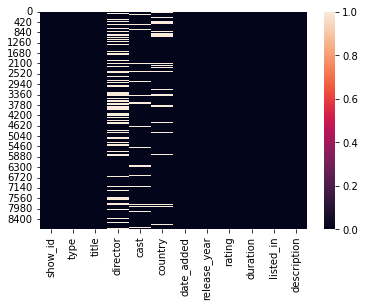

In [4]:
sns.heatmap(data=df.isna())

### Data Exploration 



#### 'What are the recensed release years in the Dataset ?'

In [5]:
print(sorted(list(df['release_year'].unique())))

[1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


#### "What are the different ratings ? And what is the most frequent one ?

In [6]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### "Is the number of Movies and TV Shows between 2016 and 2020 are equal ?"

<AxesSubplot:xlabel='type', ylabel='count'>

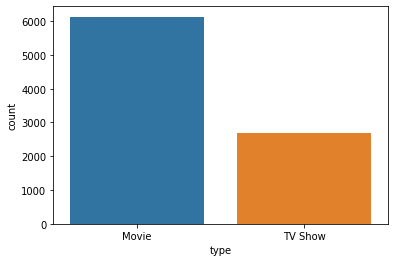

In [7]:
sns.countplot(data=df,x='type')

#### "What are the movies & shows released in christmas/end of the year time (December) ?

In [8]:
df['date_added']=df['date_added'].apply(lambda x: pd.Timestamp(x))

In [9]:
df['month']=df['date_added'].apply(lambda x : x.month)
df['day']=df['date_added'].apply(lambda x : x.day)


In [10]:
df[df['month']==12].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,2020-12-31,2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",12.0,31.0
1471,s1472,Movie,Best of Stand-Up 2020,NaN,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",NaN,2020-12-31,2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",12.0,31.0


#### "What are the most frequent genres in Netflix ?"

In [11]:
df['listed_in']=df['listed_in'].apply(lambda x : x.split(','))

In [12]:
df['listed_in'].explode().value_counts().head(10)

 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: listed_in, dtype: int64

#### "What are the most frequent number of seasons for a Netflix TV Show ?"

In [13]:
df['number_season']=df.loc[df['type']=='TV Show','duration'].apply(lambda x:x.split()[0])

<AxesSubplot:xlabel='number_season', ylabel='count'>

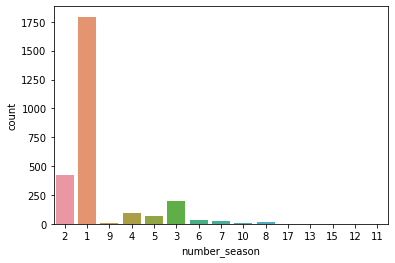

In [14]:
sns.countplot(data=df,x='number_season')

#### "What are the most frequent actors in Netflix ?"

In [15]:
df.loc[df['cast'].isna()==False,'cast'].apply(lambda x:str(x).split(',')).explode().value_counts().head(7)

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
Name: cast, dtype: int64

#### "How was the distribution of TV Shows and Movies in term of years ?"

In [16]:
df['range']=np.where(df['release_year']<=2017,'2016-2017',np.where(df['release_year']<=2019,'2018-2019','2020'))

In [17]:
df[['type','range','title']].groupby(by=['range','type']).count().sort_values

<bound method DataFrame.sort_values of                    title
range     type          
2016-2017 Movie     3937
          TV Show   1148
2018-2019 Movie     1400
          TV Show    777
2020      Movie      794
          TV Show    751>

#### "What are the most frequent original countries in Netflix ?"

In [18]:
country=df['country'].apply(lambda x : str(x).split(',')).explode()
pd.DataFrame(data=country).loc[df['country'].isna()==False,'country'].value_counts().head(10)

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
Name: country, dtype: int64